## Submitted by: Anushka Menon and Yashasvee Goel

### Answer 1

For any two sites i,j the interaction is termed as J.

The role of J is as follows: 

J>0 $\rightarrow$ Interaction is ferromagnetic

J<0 $\rightarrow$ Interaction is anti-ferromagnetic

J=0 $\rightarrow$ Non-interacting



### Answer 2

When we consider periodic boundary conditions, the last spins are considered to be their nearest neighbour of each other.

### Answer 3

In [4]:
# Defining the necessary modules

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random 
from random import choice

In [5]:
# The 1-D Ising Model

def H(J,h,s):   # Hamiltonian
    ret_value = 0.0
    n = len(s)
    for x in range(n): 
#          We start by iterating over all spin states
        ret_value += -J*(s[(x-1)%n]*s[x])-h*s[x] # for periodic boundary condition
    return ret_value

def S_random(n):   
#      Defining array of length n filled with +1 or -1 random spin states and appending it to S
    s = []
    for x in range(N):
        s.append(choice((+1,-1)))
    return s

# We have considered J = 1 and k_B = 1 as suggested in the question
J=1

# After differentiating the expression for <m> analytically, we get the following expression:

def m_exact(n,h,T):
    # ret_m = (np.tanh(h/T))/n
    # return float(ret_m)
    sin = np.sinh(h)
    cos = np.cosh(h)
    exp = np.exp(-4*J)
    ratio = (cos-np.sqrt(sin**2+exp))/(cos+np.sqrt(sin**2+exp))
    ret_value = (1-ratio**N)/(1+ratio**N)
    ret_value *= sin/np.sqrt(sin**2+exp)
    return ret_value



def m_aprox(n,h,T,I):
    num = 0.0
    den = 0.0
    for i in range(I):
        S = S_random(N)                        # create random configuration
        num += (sum(S)/N)*np.exp(-H(J,h,S)/T)  # use the observable sum(spin) / #of spins
        den += np.exp(-H(J,h,S)/T)
    return num/den
    




The relevant dimensionless ratios are as follows:

(i) J/T and,

(ii) h/T

## $<m>$ vs h for fixed N

/tmp/ipykernel_7392/3058133422.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(hRange ,exactVal ,'r',color="green")


ValueError: 'yerr' must not contain negative values

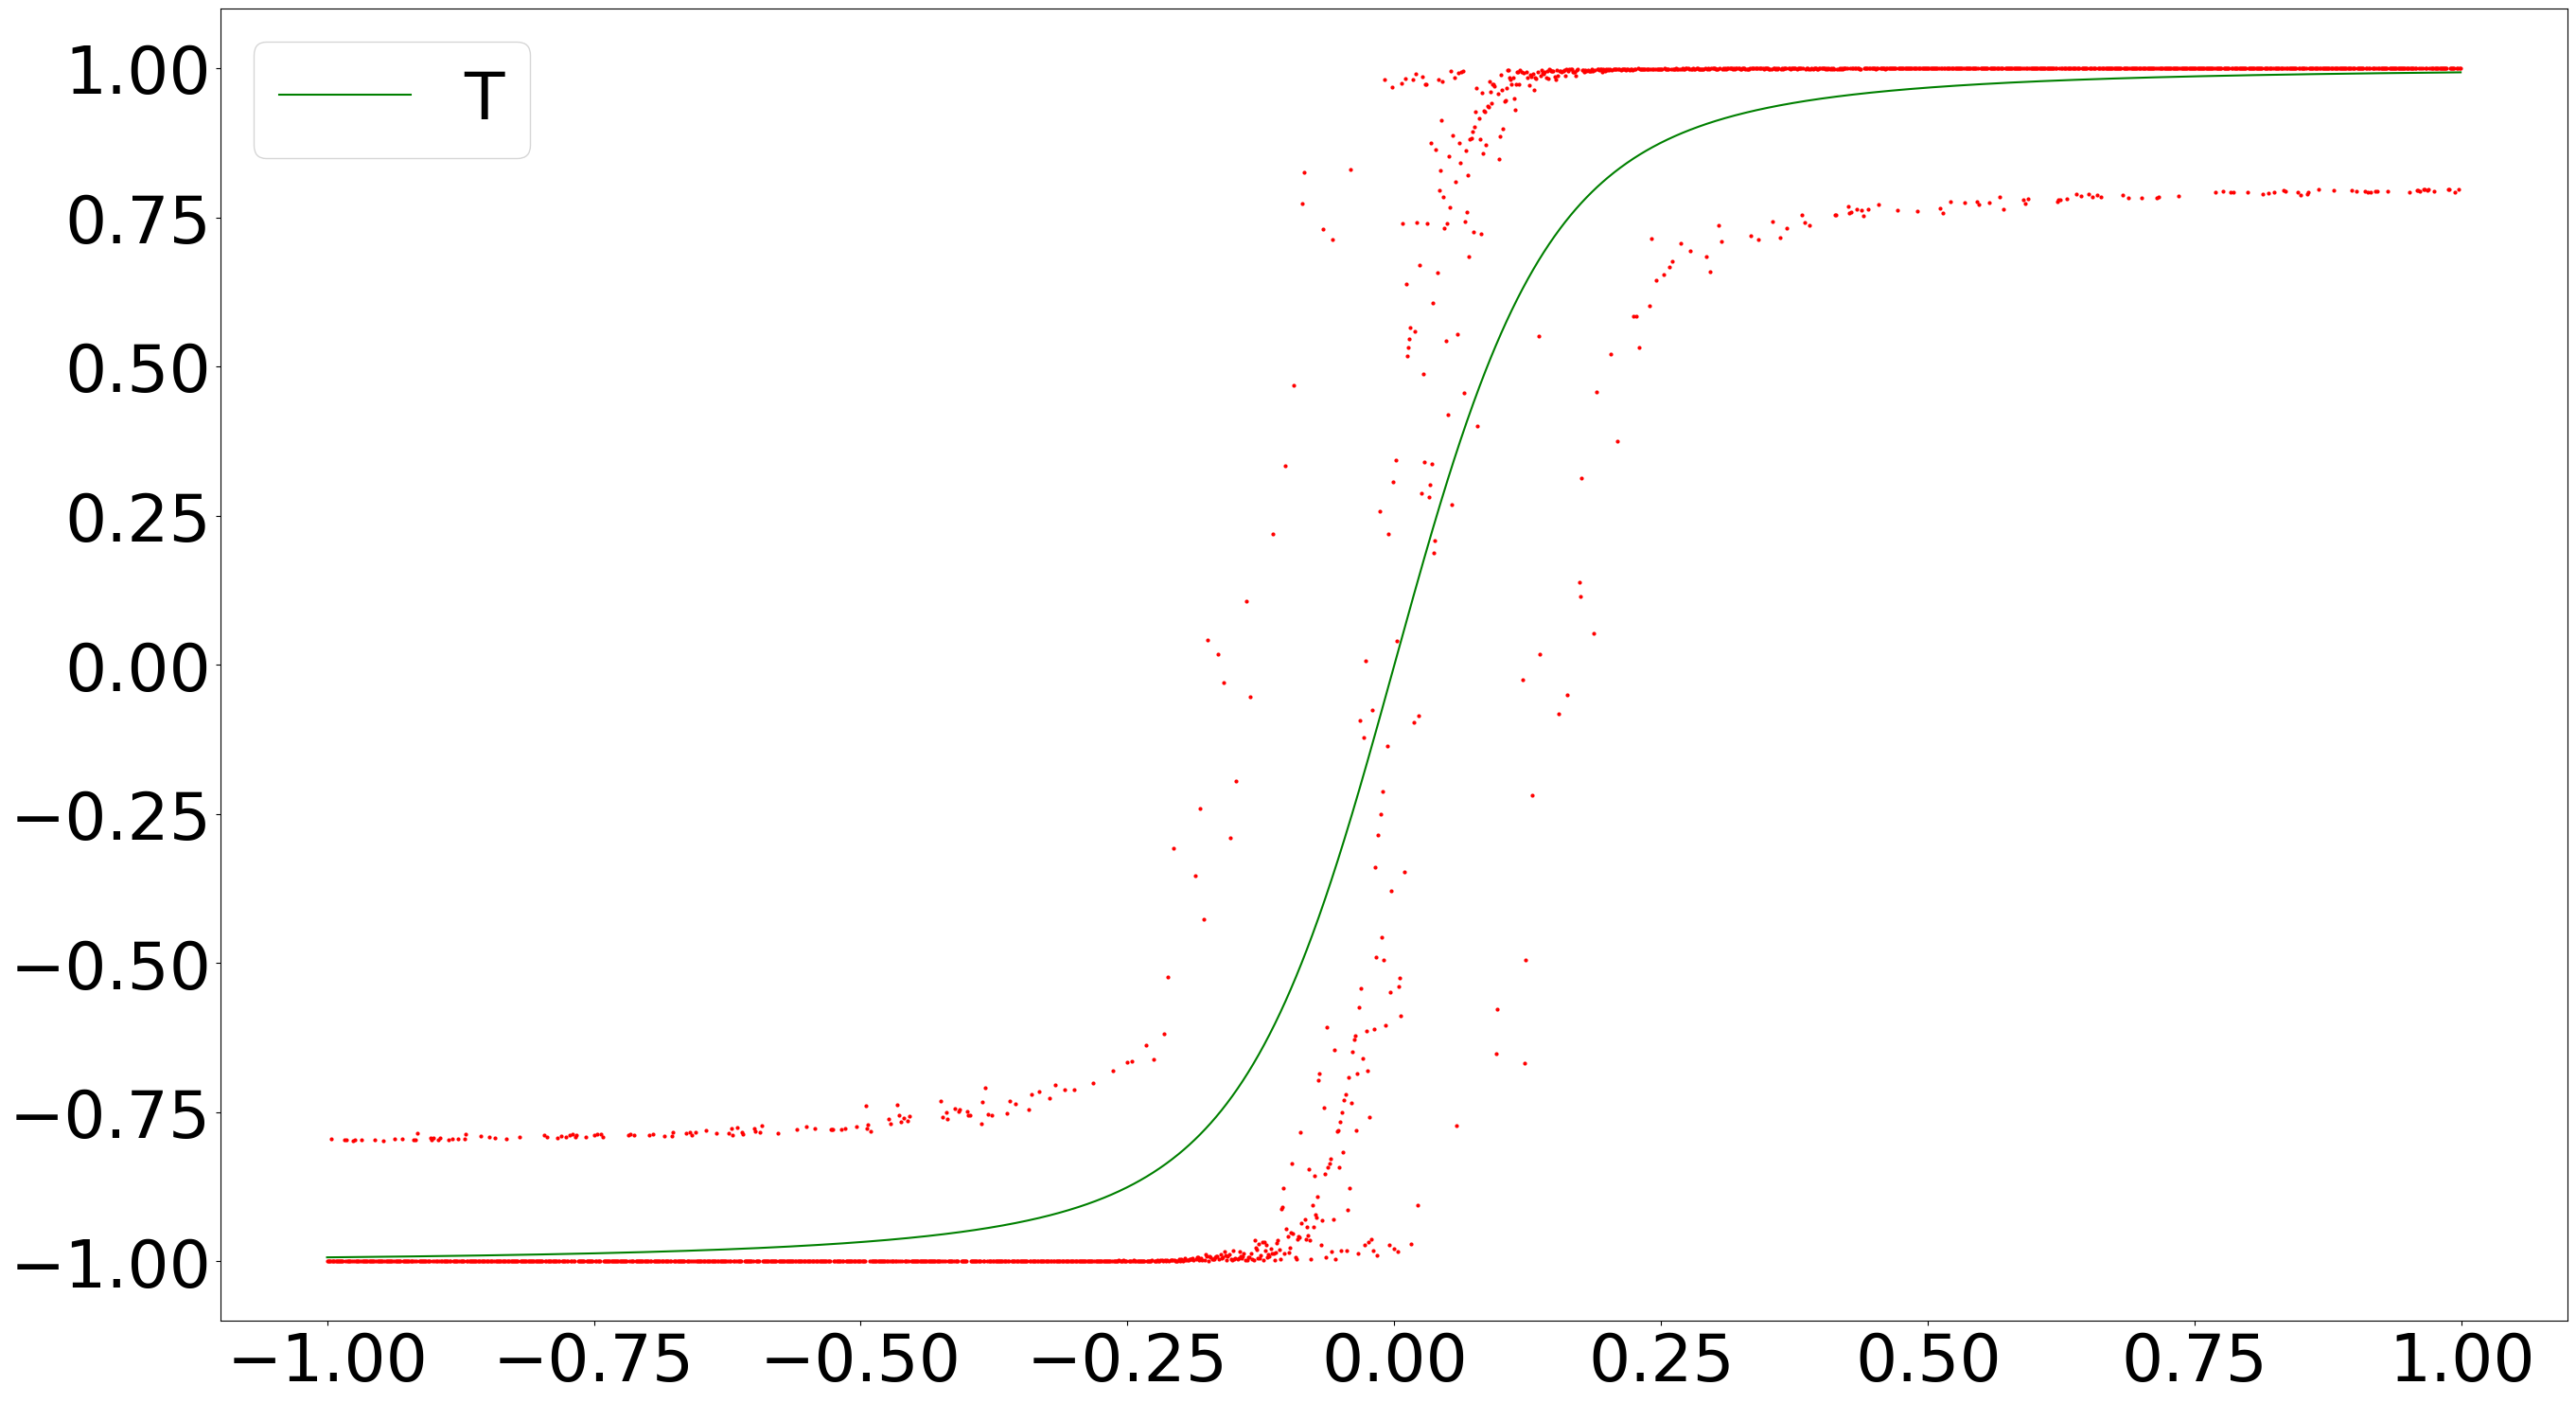

In [6]:
plt.figure(figsize=(32,18))
plt.rc('font', size=50) 

N = 10                      # Number of lattice sites           <= ~20
I  = int(2**(N+1))          # Number of generated spin configurations

# The range of h is given as [-1,1]

hRange = np.arange(-1 ,1,0.001)

exactVal=[m_exact(N,h,0.5)for h in hRange]
aproxVal=[m_aprox(N,h,0.5,I)for h in hRange]

aproxError=[val*I**-0.5 for val in aproxVal]

plt.plot(hRange ,exactVal ,'r',color="green")        
# We have chosen the value of T as 0.5
plt.legend(("T = 0.5"))                       

plt.errorbar(hRange, aproxVal, yerr=aproxError, fmt='ro', markersize=2)

plt.ylabel('<m>')
plt.xlabel('h')
plt.title("Graph for <m> vs h for fixed N")
plt.show()

    

## $<m>$ vs N for fixed h

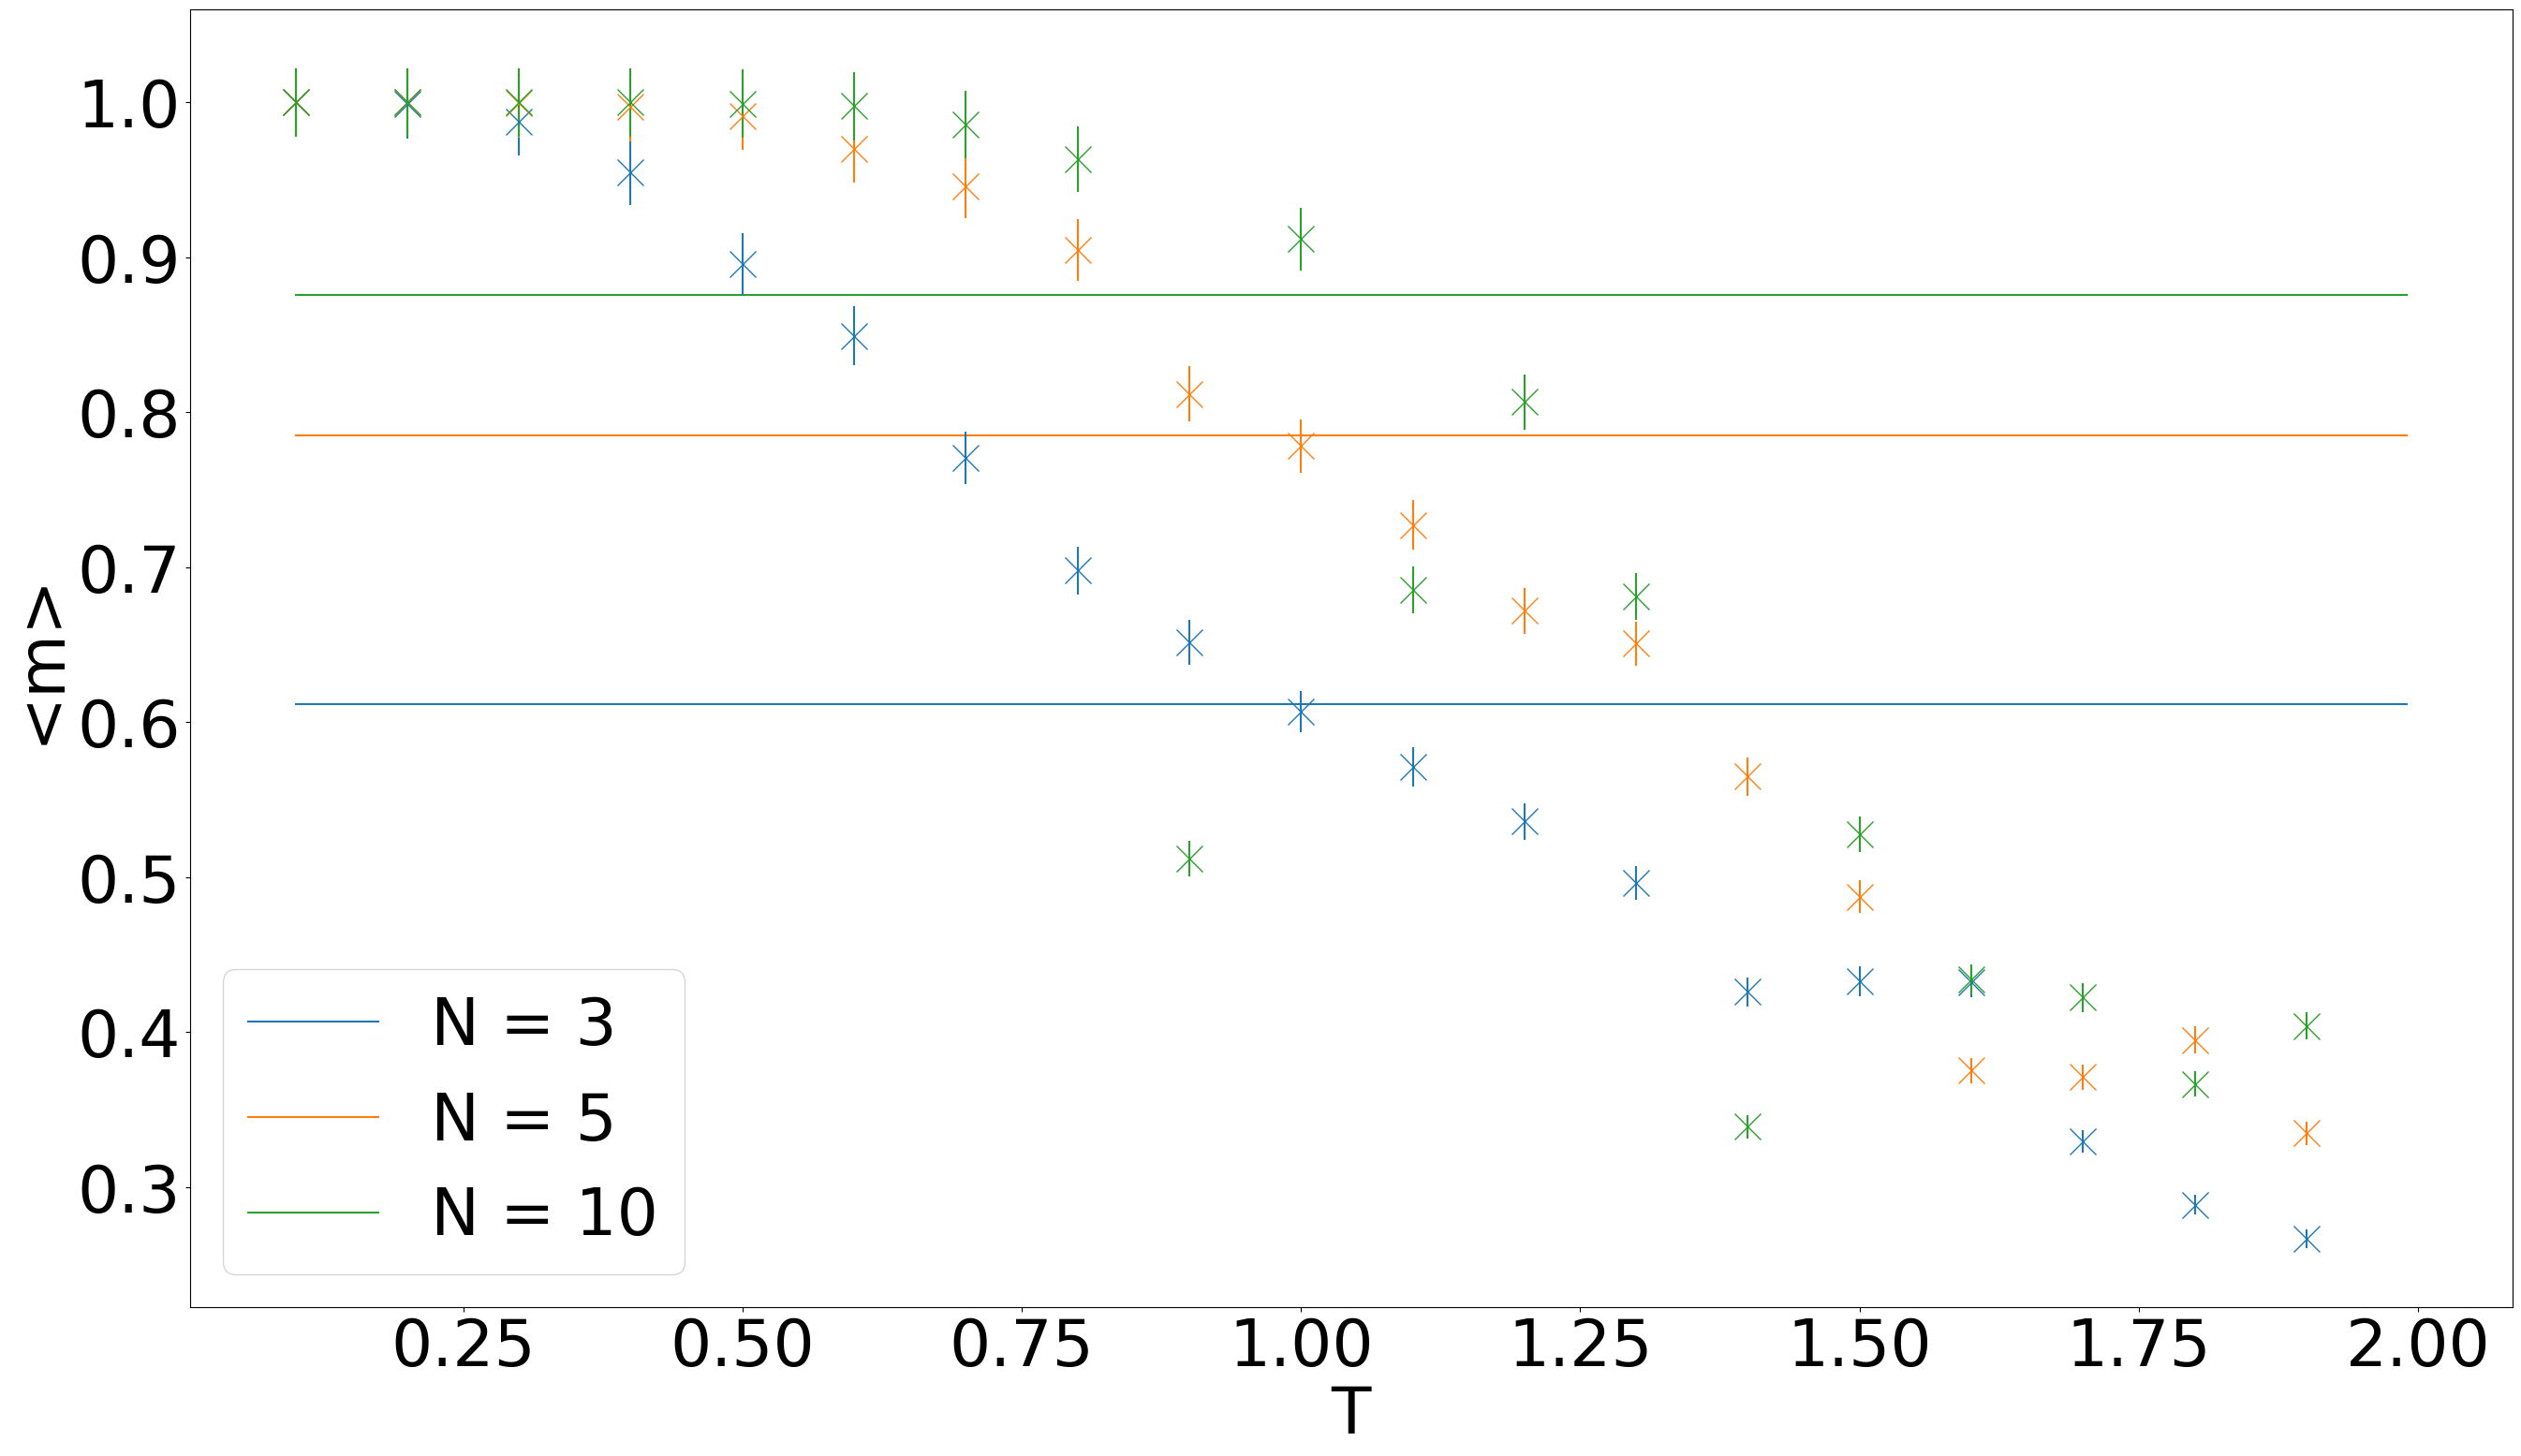

In [30]:
plt.figure(figsize=(32,18))
plt.rc('font', size=50) 

h = 0.25                  # Fixed external magnetic field       
I  = int(2**(N+1))       # Number of generated spin configurations

NRange = [3,5,10]        # Number of lattice sites


TExactRange = np.arange(0.1 ,2,0.01)  #For a range of Temperature
TAproxRange = np.arange(0.1 ,2,0.1)

for N in NRange:
    exactVal=[m_exact(N,h,T)for T in TExactRange]
    plt.plot(TExactRange ,exactVal)
plt.legend(("N = 3", "N = 5", "N = 10"))

plt.gca().set_prop_cycle(None) #reset colour cycle

for N in NRange:
    aproxVal=[m_aprox(N,h,T,I)for T in TAproxRange]
    aproxError=[val*I**-0.5 for val in aproxVal]
    plt.errorbar(TAproxRange, aproxVal, yerr=aproxError, fmt = 'x', markersize=20)
plt.ylabel('<m>')
plt.xlabel('T')
plt.show()